In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 1000

age = np.random.randint(18, 65, size=n)
income = np.random.randint(10000, 150000, size=n)
time_on_website = np.round(np.random.normal(loc=20, scale=10, size=n), 2)
previous_purchases = np.random.poisson(lam=1.5, size=n)
marketing_engaged = np.random.choice([0, 1], size=n, p=[0.4, 0.6])
search_frequency = np.random.randint(0, 20, size=n)
device_age = np.round(np.clip(np.random.normal(loc=2.5, scale=1.0, size=n), 0.2, 5.0), 1)

purchase_probability = (
    (income > 40000).astype(int) * 0.2 +
    (time_on_website > 15).astype(int) * 0.3 +
    (previous_purchases > 0).astype(int) * 0.2 +
    marketing_engaged * 0.2 +
    (search_frequency > 5).astype(int) * 0.1 +
    (device_age > 2).astype(int) * 0.1
)

purchase_probability = np.clip(purchase_probability, 0, 1)

will_purchase = (np.random.rand(n) < purchase_probability).astype(int)

df = pd.DataFrame({
    'age': age,
    'income': income,
    'time_on_website': time_on_website,
    'previous_purchases': previous_purchases,
    'marketing_engaged': marketing_engaged,
    'search_frequency': search_frequency,
    'device_age': device_age,
    'will_purchase': will_purchase
})

df.to_csv('smartphone_purchase_data.csv', index=False)

print("✅ Dataset generated and saved as 'smartphone_purchase_data.csv'")


✅ Dataset generated and saved as 'smartphone_purchase_data.csv'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("smartphone_purchase_data.csv")

df.head()


,age,income,time_on_website,previous_purchases,marketing_engaged,search_frequency,device_age,will_purchase
0,56,126748,29.19,3,1,4,2.0,1
1,46,15287,17.10,1,1,17,1.7,1
2,32,18512,22.67,1,1,15,1.3,1
3,60,142414,23.22,1,0,7,2.5,1
4,25,118872,13.32,2,1,19,3.7,1


In [3]:
df.info()

print("\nMissing values:\n", df.isnull().sum())

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1000 non-null   int64  
 1   income              1000 non-null   int64  
 2   time_on_website     1000 non-null   float64
 3   previous_purchases  1000 non-null   int64  
 4   marketing_engaged   1000 non-null   int64  
 5   search_frequency    1000 non-null   int64  
 6   device_age          1000 non-null   float64
 7   will_purchase       1000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 62.6 KB

Missing values:
 age                   0
income                0
time_on_website       0
previous_purchases    0
marketing_engaged     0
search_frequency      0
device_age            0
will_purchase         0
dtype: int64


,age,income,time_on_website,previous_purchases,marketing_engaged,search_frequency,device_age,will_purchase
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.986000,81228.252000,20.264930,1.488000,0.599000,9.601000,2.443300,0.779000
std,13.497852,40346.642563,9.837834,1.203871,0.490346,5.772445,1.028948,0.415128
min,18.000000,10126.000000,-10.200000,0.000000,0.000000,0.000000,0.200000,0.000000
25%,29.000000,46014.750000,13.835000,1.000000,0.000000,5.000000,1.700000,1.000000
50%,42.000000,81813.000000,20.065000,1.000000,1.000000,10.000000,2.400000,1.000000
75%,52.000000,116032.250000,26.782500,2.000000,1.000000,15.000000,3.100000,1.000000
max,64.000000,149999.000000,51.930000,6.000000,1.000000,19.000000,5.000000,1.000000


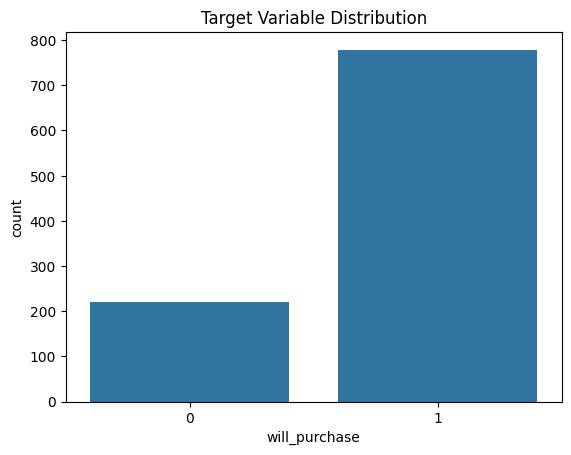

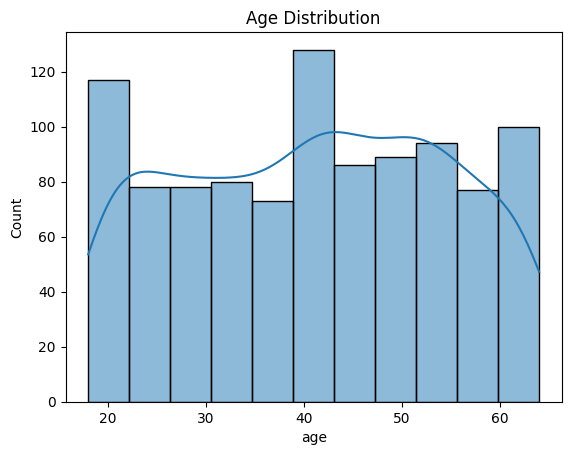

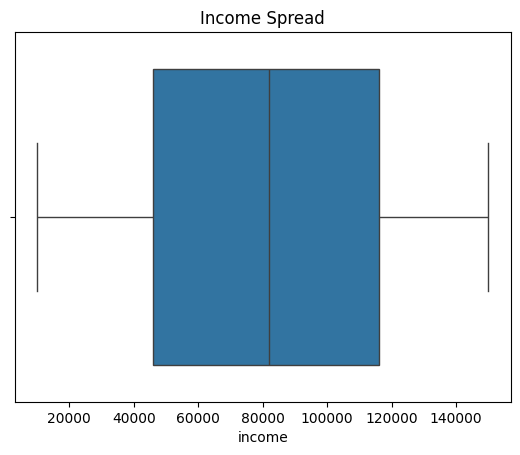

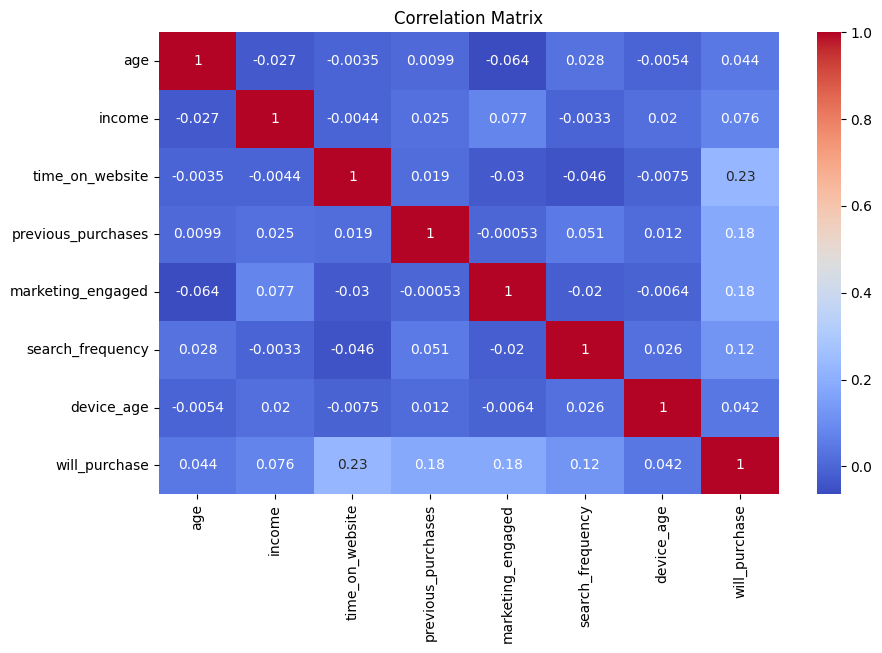

In [4]:
sns.countplot(x='will_purchase', data=df)
plt.title("Target Variable Distribution")
plt.show()

sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

sns.boxplot(x='income', data=df)
plt.title("Income Spread")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('will_purchase', axis=1)
y = df['will_purchase']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"📊 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


📊 Logistic Regression Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.70      0.29      0.41        48
           1       0.81      0.96      0.88       152

    accuracy                           0.80       200
   macro avg       0.76      0.63      0.65       200
weighted avg       0.78      0.80      0.77       200

--------------------------------------------------
📊 Random Forest Accuracy: 0.7750
              precision    recall  f1-score   support

           0       0.55      0.35      0.43        48
           1       0.82      0.91      0.86       152

    accuracy                           0.78       200
   macro avg       0.68      0.63      0.65       200
weighted avg       0.75      0.78      0.76       200

--------------------------------------------------
📊 SVM Accuracy: 0.7750
              precision    recall  f1-score   support

           0       0.60      0.19      0.29        48
           1       0.79      0.96      0

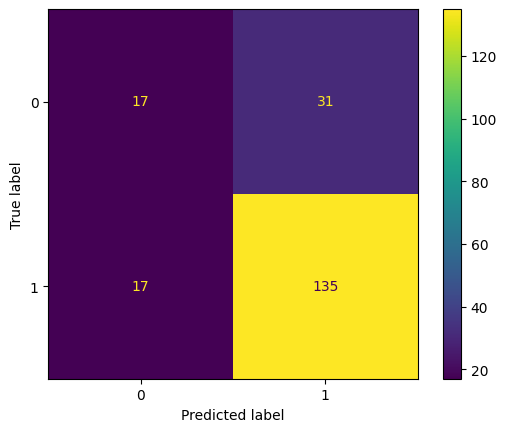

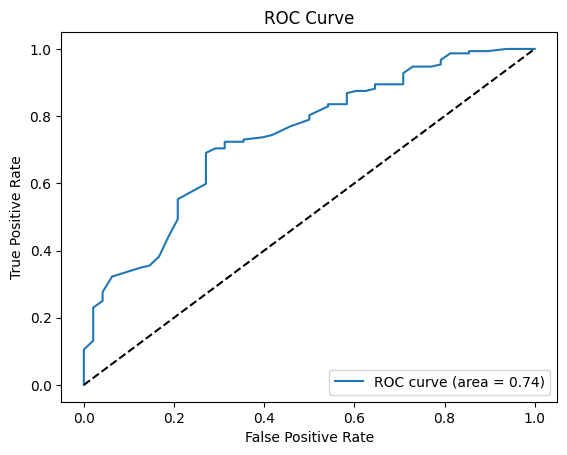

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

best_model = RandomForestClassifier()
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'max_depth': 5, 'n_estimators': 100}
Best Score: 0.7849999999999999


In [12]:
import joblib


joblib.dump(best_model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']